<a href="https://colab.research.google.com/github/jo-cho/memos/blob/master/RL/sentdex_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

RL

In [0]:
!pip install -q pyvirtualdisplay
!sudo apt-get install -q xvfb

Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 783 kB of archives.
After this operation, 2,266 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.3 [783 kB]
Fetched 783 kB in 0s (7,544 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfi

In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

tracking


엡실론을 넣자 (exploration개념)

0
Episode : 0, avg : -200.0, min : -200.0, max : -200.0
500
Episode : 500, avg : -200.0, min : -200.0, max : -200.0
1000
Episode : 1000, avg : -200.0, min : -200.0, max : -200.0
1500
Episode : 1500, avg : -200.0, min : -200.0, max : -200.0
2000
Episode : 2000, avg : -200.0, min : -200.0, max : -200.0
2500
Episode : 2500, avg : -200.0, min : -200.0, max : -200.0
3000
Episode : 3000, avg : -200.0, min : -200.0, max : -200.0
3500
Episode : 3500, avg : -199.774, min : -200.0, max : -171.0
4000
Episode : 4000, avg : -199.616, min : -200.0, max : -159.0
4500
Episode : 4500, avg : -198.212, min : -200.0, max : -155.0
5000
Episode : 5000, avg : -191.346, min : -200.0, max : -152.0
5500
Episode : 5500, avg : -197.346, min : -200.0, max : -162.0
6000
Episode : 6000, avg : -197.35, min : -200.0, max : -153.0
6500
Episode : 6500, avg : -188.496, min : -200.0, max : -117.0
7000
Episode : 7000, avg : -189.452, min : -200.0, max : -148.0
7500
Episode : 7500, avg : -187.926, min : -200.0, max : -152.0

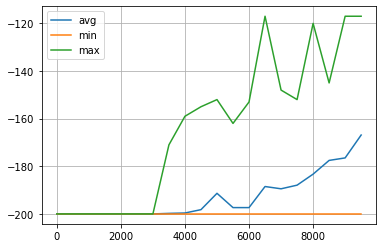

In [0]:
# objective is to get the cart to the flag.
# for now, let's just move randomly:

import gym
import numpy as np
import matplotlib.pyplot as plt


env = gym.make("MountainCar-v0")

LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 10000
SHOW_EVERY = 500

DISCRETE_OS_SIZE = [40] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

# Exploration settings
epsilon = 1  # not a constant, qoing to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES // 2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)


q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

ep_rewards = []
aggr_ep_rewards = {'ep':[],'avg':[],'min':[],'max':[]} #which models


def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))  # we use this tuple to look up the 3 Q values for the available actions in the q-table


for episode in range(EPISODES):
    episode_reward = 0
    discrete_state = get_discrete_state(env.reset())
    done = False

    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else:
        render = False

    while not done:

        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)


        new_state, reward, done, _ = env.step(action)
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % SHOW_EVERY == 0:
            env.render()
        #new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

        # If simulation did not end yet after last step - update Q table
        if not done:

            # Maximum possible Q value in next step (for new state)
            max_future_q = np.max(q_table[new_discrete_state])

            # Current Q value (for current state and performed action)
            current_q = q_table[discrete_state + (action,)]

            # And here's our equation for a new Q value for current state and action
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # Update Q table with new Q value
            q_table[discrete_state + (action,)] = new_q


        # Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
        elif new_state[0] >= env.goal_position:
            #print(f"We made it on episode {episode}")
            #q_table[discrete_state + (action,)] = reward
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state

    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

    ep_rewards.append(episode_reward)

    if not episode % SHOW_EVERY:
        average_reward = sum(ep_rewards[-SHOW_EVERY:])/len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))

        print(f"Episode : {episode}, avg : {average_reward}, min : {min(ep_rewards[-SHOW_EVERY:])}, max : {max(ep_rewards[-SHOW_EVERY:])}")


env.close()
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label='avg')
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label='min')
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label='max')
plt.legend(loc=2)
plt.grid(True)
plt.show()


출처:

https://youtu.be/CBTbifYx6a8?list=PLQVvvaa0QuDezJFIOU5wDdfy4e9vdnx-7


https://pythonprogramming.net/q-learning-analysis-reinforcement-learning-python-tutorial/